In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species_id'] = y
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
print(" First 5 rows of the dataset ")
print(df.head())
print("\nDataset Info ")
df.info()
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

 First 5 rows of the dataset 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species_name  
0           0       setosa  
1           0       setosa  
2           0       setosa  
3           0       setosa  
4           0       setosa  

Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   p

C:\Users\manju\AppData\Local\Temp\ipykernel_24160\1551701863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species_name', data=df, palette='viridis')


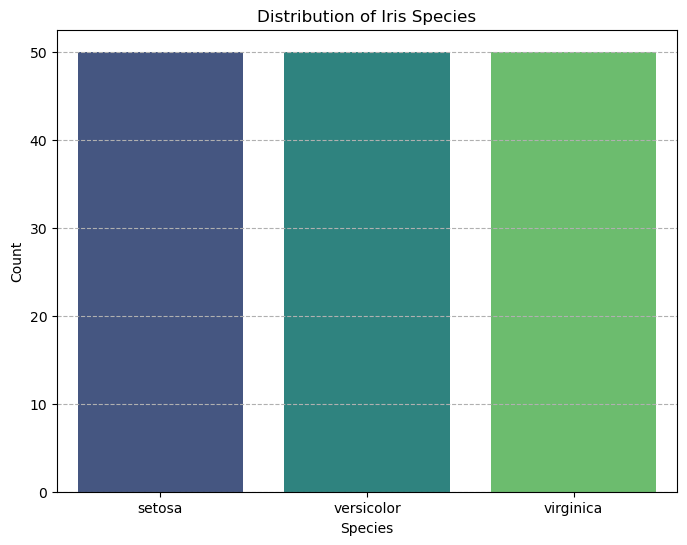

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species_name', data=df, palette='viridis')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

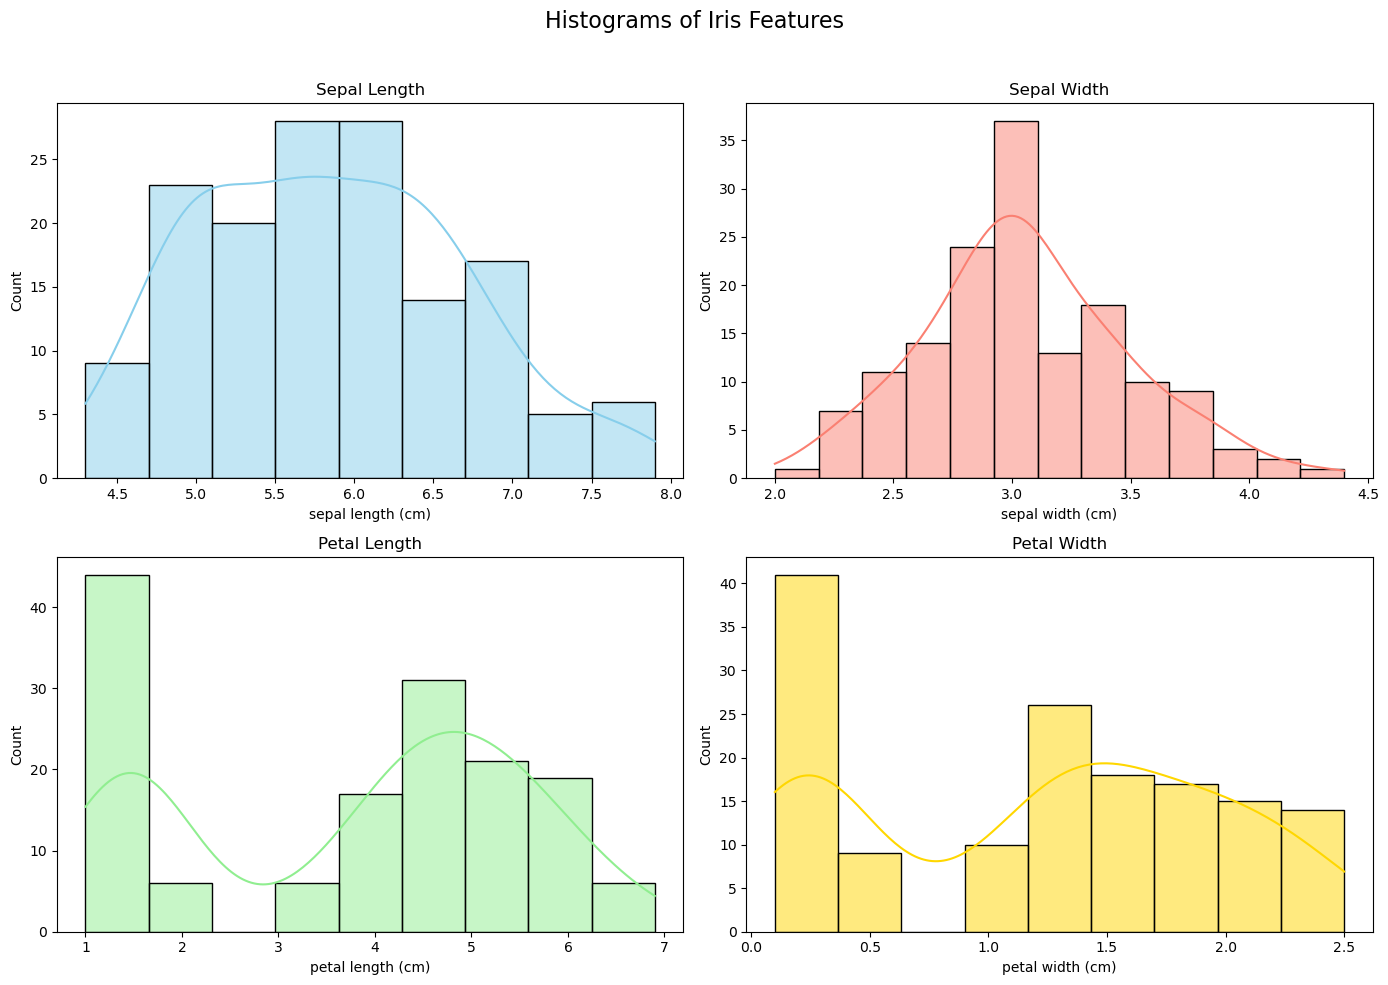

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Histograms of Iris Features', fontsize=16)

sns.histplot(df['sepal length (cm)'], ax=axes[0,0], kde=True, color='skyblue')
axes[0,0].set_title('Sepal Length')

sns.histplot(df['sepal width (cm)'], ax=axes[0,1], kde=True, color='salmon')
axes[0,1].set_title('Sepal Width')

sns.histplot(df['petal length (cm)'], ax=axes[1,0], kde=True, color='lightgreen')
axes[1,0].set_title('Petal Length')

sns.histplot(df['petal width (cm)'], ax=axes[1,1], kde=True, color='gold')
axes[1,1].set_title('Petal Width')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

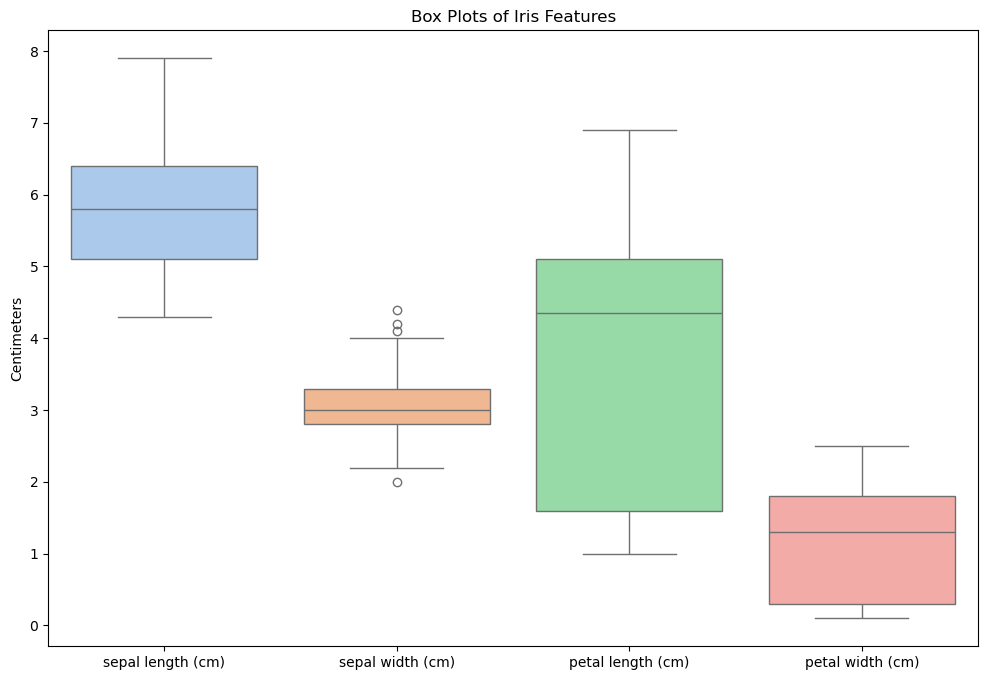

In [7]:
plt.figure(figsize=(12, 8))
df_melted_features = df.drop(['species_id', 'species_name'], axis=1)
sns.boxplot(data=df_melted_features, palette='pastel')
plt.title('Box Plots of Iris Features')
plt.ylabel('Centimeters')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [9]:
# Train the model
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

dt_classifier.fit(X_train, y_train)
print("\nDecision Tree Classifier Trained ")


Decision Tree Classifier Trained 


In [14]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
y_pred = dt_classifier.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")


--- Model Evaluation ---
Accuracy: 0.9778


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [18]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


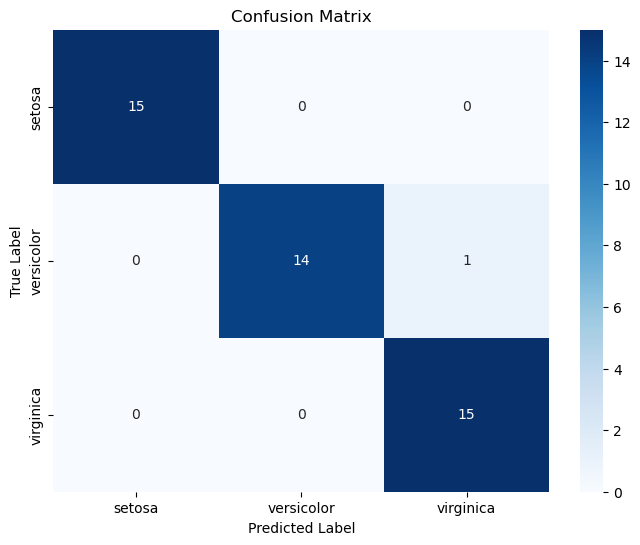

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

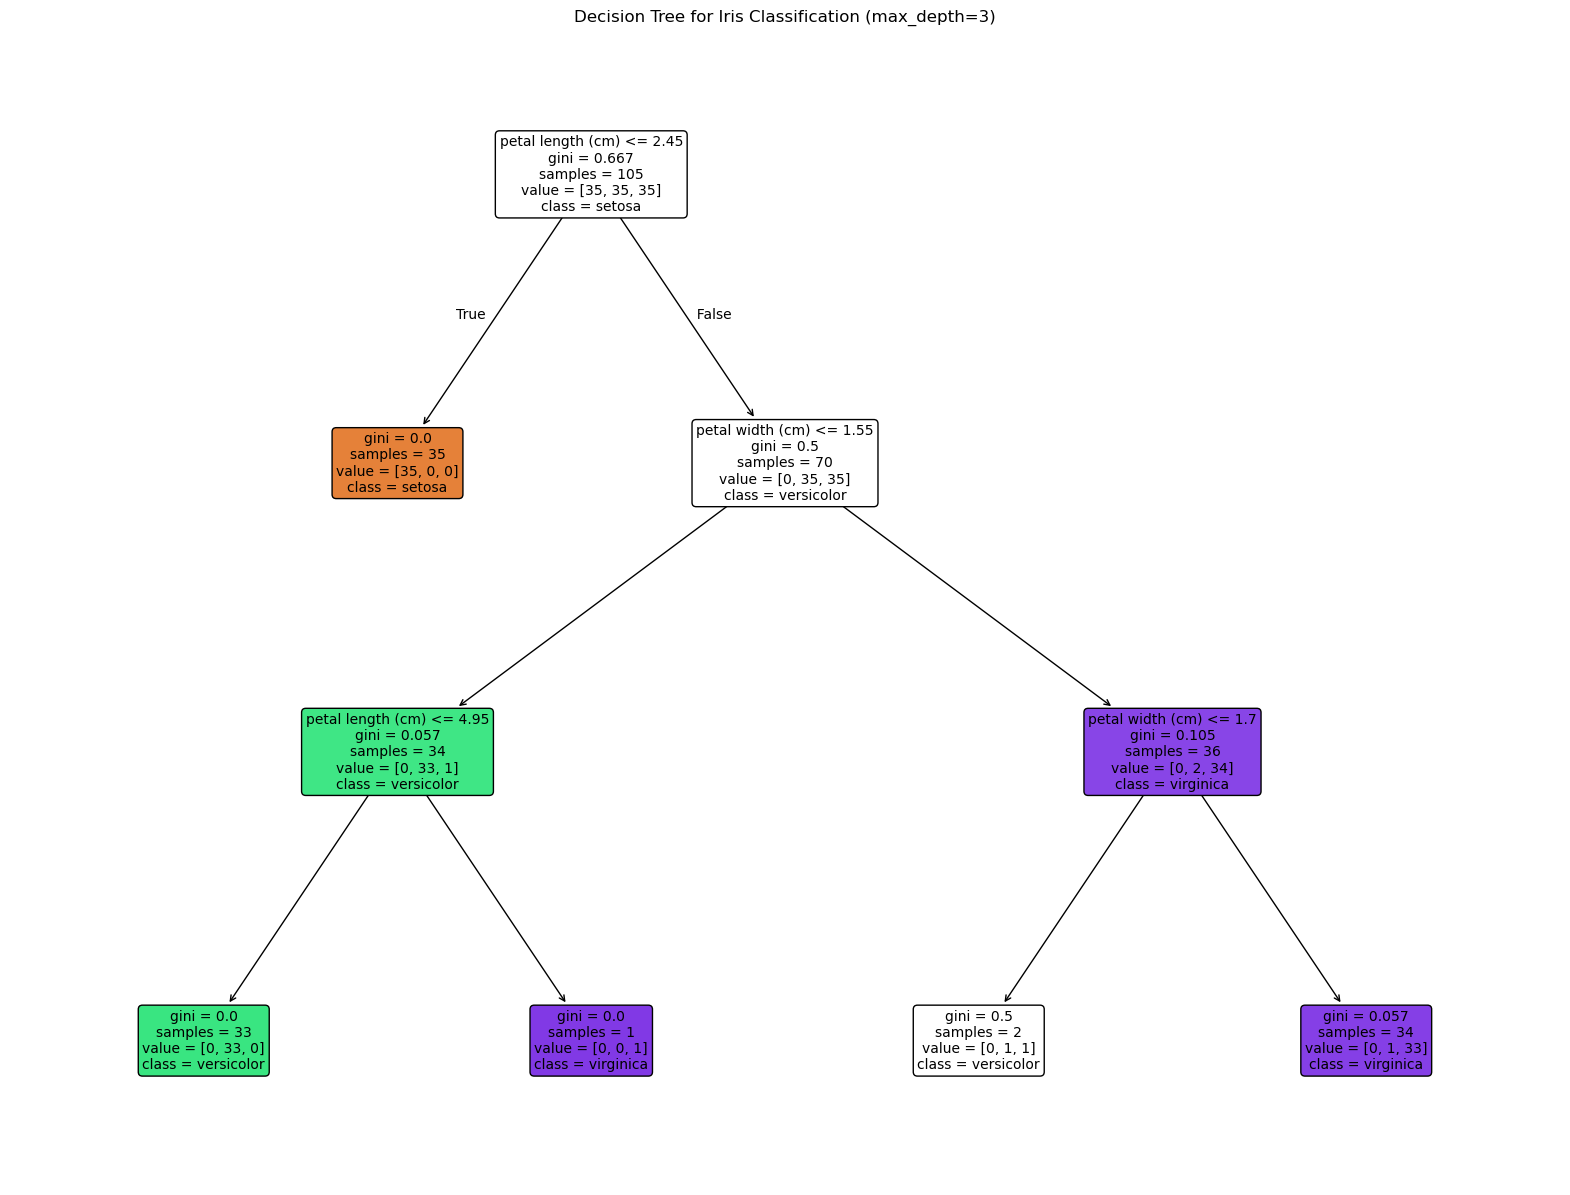

In [ ]:
plt.figure(figsize=(20,15)) 
plot_tree(dt_classifier,
          filled=True, 
          rounded=True, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          fontsize=10) 
plt.title(f"Decision Tree for Iris Classification (max_depth={dt_classifier.get_params()['max_depth']})")
plt.show()

In [21]:
print("\n--- Model Analysis ---")
print(f"Tree Depth: {dt_classifier.get_depth()}")
print(f"Number of Leaves: {dt_classifier.get_n_leaves()}")


--- Model Analysis ---
Tree Depth: 3
Number of Leaves: 5


In [22]:
importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': iris.feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
             feature  importance
2  petal length (cm)    0.550877
3   petal width (cm)    0.449123
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


C:\Users\manju\AppData\Local\Temp\ipykernel_24160\1465694885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


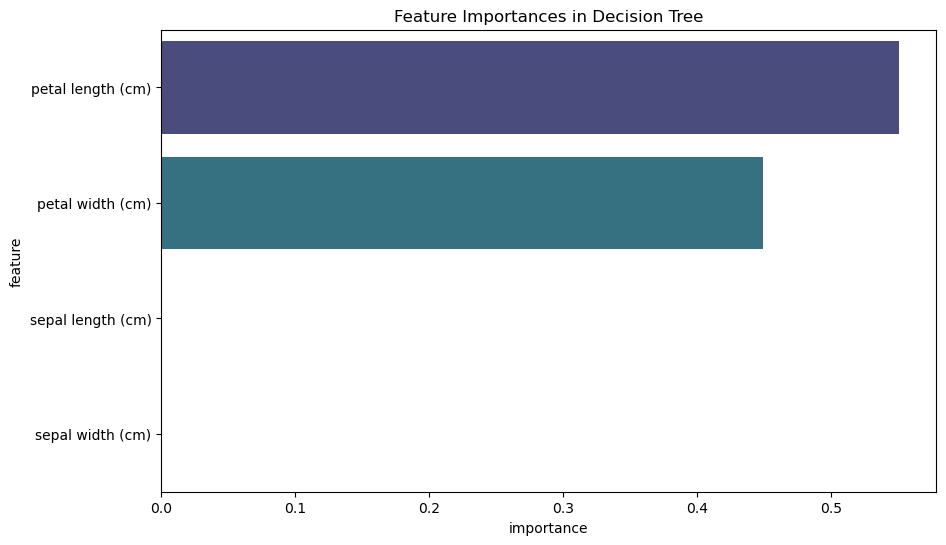

In [23]:

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances in Decision Tree')
plt.show()